## Import Libraries

In [ ]:
import statistics
import numpy as np
import pandas as pd
import seaborn as sns
import math
import joblib
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer

## Load the Data

In [ ]:
data=pd.read_csv('/content/train.csv')

## Data Understanding

In [ ]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [ ]:
data.tail()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.798
9796,9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.368
9797,9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.188
9798,9799,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.376
9799,9800,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-AC-10000487,Technology,Accessories,SanDisk Cruzer 4 GB USB Flash Drive,10.384


In [ ]:
data.shape

(9800, 18)

In [ ]:
data.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [ ]:
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

In [ ]:
data.dtypes

,0
Row ID,int64
Order ID,object
Order Date,object
Ship Date,object
Ship Mode,object
Customer ID,object
Customer Name,object
Segment,object
Country,object
City,object


In [ ]:
data.isnull().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


In [ ]:
data.duplicated().sum()

0

## Handle Missing Values

In [ ]:
numerical_cols = data.select_dtypes(include=['float64']).columns
for col in numerical_cols:
    data[col].fillna(data[col].mean(), inplace=True)

<ipython-input-704-a6aee263a1ff>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mean(), inplace=True)


In [ ]:
data.isnull().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


## Standardizing

In [ ]:
# Standardize column names
data.columns = data.columns.str.strip() # Remove leading/trailing whitespace
data.columns = data.columns.str.lower() # Convert to lowercase
data.columns = data.columns.str.replace(' ', '_') # Replace spaces with underscores
data.columns = data.columns.str.replace(r'[^\w\s]', '') # Remove special characters (except underscores)

# Display standardized column names
print("Standardized column names:", data.columns)

# Display the DataFrame
print(data)

Standardized column names: Index(['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode',
       'customer_id', 'customer_name', 'segment', 'country', 'city', 'state',
       'postal_code', 'region', 'product_id', 'category', 'sub-category',
       'product_name', 'sales'],
      dtype='object')
      row_id        order_id  order_date   ship_date       ship_mode  \
0          1  CA-2017-152156  08/11/2017  11/11/2017    Second Class   
1          2  CA-2017-152156  08/11/2017  11/11/2017    Second Class   
2          3  CA-2017-138688  12/06/2017  16/06/2017    Second Class   
3          4  US-2016-108966  11/10/2016  18/10/2016  Standard Class   
4          5  US-2016-108966  11/10/2016  18/10/2016  Standard Class   
...      ...             ...         ...         ...             ...   
9795    9796  CA-2017-125920  21/05/2017  28/05/2017  Standard Class   
9796    9797  CA-2016-128608  12/01/2016  17/01/2016  Standard Class   
9797    9798  CA-2016-128608  12/01/2016  17/01/2

In [ ]:
data.columns

Index(['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode',
       'customer_id', 'customer_name', 'segment', 'country', 'city', 'state',
       'postal_code', 'region', 'product_id', 'category', 'sub-category',
       'product_name', 'sales'],
      dtype='object')

In [ ]:
data.dtypes

,0
row_id,int64
order_id,object
order_date,object
ship_date,object
ship_mode,object
customer_id,object
customer_name,object
segment,object
country,object
city,object


## Encoding

In [ ]:
def classify_columns(data):
    ordinal_columns = {}
    nominal_columns = []

    for col in data.select_dtypes(include=['object']).columns:
        unique_vals = data[col].nunique(dropna=False)

        # Manually review the columns
        if col in ['ship_mode', 'segment', 'region']:  # Example of manually classifying as ordinal
            ordinal_columns[col] = "Needs Manual Ordering"  # Adjust this based on actual order
        elif unique_vals <= 10:
            print(f"Check if '{col}' should be ordinal (Unique Values: {unique_vals})")
        else:
            nominal_columns.append(col)

    return ordinal_columns, nominal_columns

ordinal_cols, nominal_cols = classify_columns(data)

print("Ordinal Columns:", ordinal_cols)
print("Nominal Columns:", nominal_cols)


Check if 'country' should be ordinal (Unique Values: 1)
Check if 'category' should be ordinal (Unique Values: 3)
Ordinal Columns: {'ship_mode': 'Needs Manual Ordering', 'segment': 'Needs Manual Ordering', 'region': 'Needs Manual Ordering'}
Nominal Columns: ['order_id', 'order_date', 'ship_date', 'customer_id', 'customer_name', 'city', 'state', 'product_id', 'sub-category', 'product_name']


## One-Hot Encoding

In [ ]:
# List of nominal columns
nominal_columns = ['order_id', 'order_date', 'ship_date', 'customer_id', 'customer_name', 'city', 'state', 'product_id', 'sub-category', 'product_name']

# Apply one-hot encoding to nominal columns
data_encoded = pd.get_dummies(data, columns=nominal_columns, drop_first=True)

# Display the first few rows of the DataFrame after encoding
print(data_encoded.head())

   row_id       ship_mode    segment        country  postal_code region  \
0       1    Second Class   Consumer  United States      42420.0  South   
1       2    Second Class   Consumer  United States      42420.0  South   
2       3    Second Class  Corporate  United States      90036.0   West   
3       4  Standard Class   Consumer  United States      33311.0  South   
4       5  Standard Class   Consumer  United States      33311.0  South   

          category     sales  order_id_CA-2015-100090  \
0        Furniture  261.9600                    False   
1        Furniture  731.9400                    False   
2  Office Supplies   14.6200                    False   
3        Furniture  957.5775                    False   
4  Office Supplies   22.3680                    False   

   order_id_CA-2015-100293  ...  \
0                    False  ...   
1                    False  ...   
2                    False  ...   
3                    False  ...   
4                    False  ...

## Label Encoding

In [ ]:
# List of ordinal columns (make sure this matches the actual columns in your DataFrame)
ordinal_columns = [
    'ship_mode',
    'segment',
    'country',
    'region',
    'category',
    'order_id',
    'order_date',
    'ship_date',
    'customer_id',
    'customer_name',
    'city',
    'state',
    'product_id',
    'sub-category',
    'product_name'

]

# Initialize the LabelEncoder
le = LabelEncoder()

# Apply label encoding to each ordinal column
for column in ordinal_columns:
    if column in data.columns:
        data[column] = le.fit_transform(data[column])

# Display the first few rows of the DataFrame after encoding
print(data.head())

   row_id  order_id  order_date  ship_date  ship_mode  customer_id  \
0       1      2456         314        476          2          143   
1       2      2456         314        476          2          143   
2       3      2254         456        673          2          237   
3       4      4295         432        774          3          705   
4       5      4295         432        774          3          705   

   customer_name  segment  country  city  state  postal_code  region  \
0            166        0        0   194     15      42420.0       2   
1            166        0        0   194     15      42420.0       2   
2            201        1        0   265      3      90036.0       3   
3            687        0        0   153      8      33311.0       2   
4            687        0        0   153      8      33311.0       2   

   product_id  category  sub-category  product_name     sales  
0          12         0             4           386  261.9600  
1          55     

In [ ]:
data.dtypes

,0
row_id,int64
order_id,int64
order_date,int64
ship_date,int64
ship_mode,int64
customer_id,int64
customer_name,int64
segment,int64
country,int64
city,int64


In [ ]:
data = data.drop(columns=['country'])

## Correlation

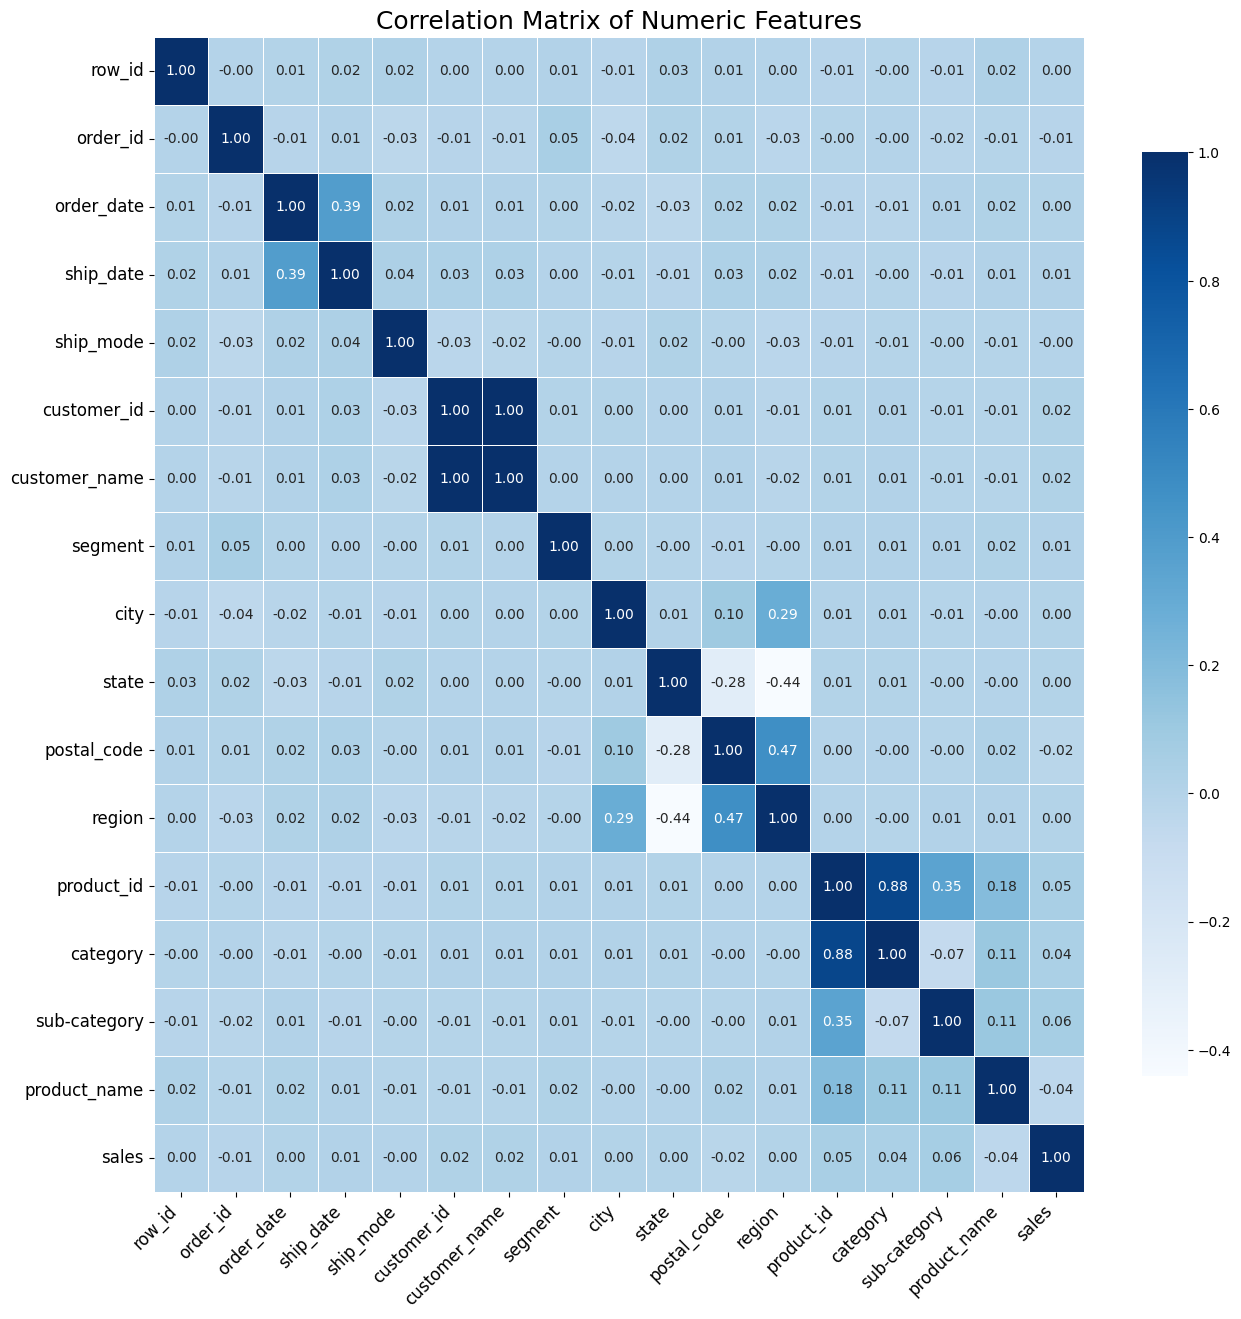

In [ ]:
# Convert columns to numeric where possible, invalid parsing will be set to NaN
data = data.apply(pd.to_numeric, errors='coerce')

# Select only numeric columns (int and float types)
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Fill NaN values in the correlation matrix (in case of missing correlations)
correlation_matrix_filled = correlation_matrix.fillna(0)

# Set up the plot size and aesthetics for better visualization
plt.figure(figsize=(15, 15))

# Create a heatmap with more detailed formatting
sns.heatmap(correlation_matrix_filled, annot=True, cmap='Blues', fmt='.2f', linewidths=0.5, cbar_kws={"shrink": .8})

# Add titles and labels
plt.title('Correlation Matrix of Numeric Features', fontsize=18)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)

# Display the heatmap
plt.show()

## Split the Data

In [ ]:
# Define the features (X) and target (y)
X = data[['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode',
          'customer_id', 'customer_name', 'segment', 'city', 'state',
          'postal_code', 'region', 'product_id', 'category', 'sub-category',
          'product_name', 'sales']]
y = data['sales']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Creation

In [ ]:
# Replace infinite values with NaN and handle them in X_train
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
X_train.fillna(X_train.mean(), inplace=True)

# Create and fit the Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Initialize RFE and select the number of features to keep (e.g., 3)
rfe = RFE(model, n_features_to_select=3)
rfe.fit(X_train, y_train)

# Get the ranking of features
feature_ranking = pd.DataFrame({'Feature': X.columns, 'Ranking': rfe.ranking_})
print("Features ranked by RFE:")
print(feature_ranking.sort_values('Ranking'))

# Now let's evaluate the model performance on test data
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest Regressor model on the training data
model.fit(X_train, y_train)

Features ranked by RFE:
          Feature  Ranking
16          sales        1
4       ship_mode        1
5     customer_id        1
15   product_name        2
9           state        3
3       ship_date        4
1        order_id        5
8            city        6
7         segment        7
0          row_id        8
6   customer_name        9
10    postal_code       10
14   sub-category       11
2      order_date       12
11         region       13
12     product_id       14
13       category       15


RandomForestRegressor(random_state=42)

## Model Evaluation

In [ ]:
# Make predictions
y_pred = model.predict(X_test)

# Calculate error metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Define the "accuracy-like" metric: % of predictions within 10% of actual values
within_10_percent = np.abs((y_test - y_pred) / y_test) <= 0.10
accuracy_like_metric = np.mean(within_10_percent) * 100

# Print evaluation metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")
print(f"Accuracy-like metric (within 10%): {accuracy_like_metric:.2f}%")

Mean Absolute Error (MAE): 6.72
Mean Squared Error (MSE): 42694.49
Root Mean Squared Error (RMSE): 206.63
R-squared (R²): 0.94
Accuracy-like metric (within 10%): 99.90%


## Random Forest Regressor model

In [ ]:
# Save the trained Random Forest Regressor model to a file
joblib.dump(model, 'random_forest_regressor_model.pkl')

# To load the model later
loaded_rf_model = joblib.load('random_forest_regressor_model.pkl')